# Aula 1 - Classificação: o que é e como funciona?

## 1.1 - Apresentação


## 1.2 - Importando os dados

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('C:\Cursos_Alura\Machine_Learning\Curso_02\ML_Classificacao_por_tras_dos_panos-main\Dados\Customer-Churn.csv')

In [6]:
dados.shape

(7043, 18)

In [7]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.3 - Diferentes Variáveis

In [8]:
#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [9]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [10]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


## 1.4 - Definição Informal

(slides)

## 1.5 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [11]:
#DICA
pd.set_option('display.max_columns', 39)

In [12]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0



$y_i$ = $f(x_i)$

In [13]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [14]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## Balanceamento dos dados

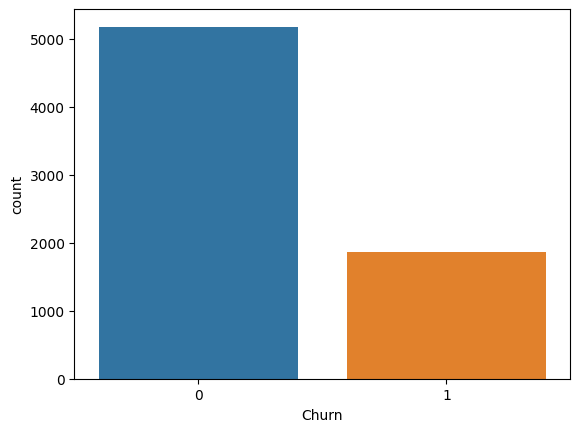

In [15]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [16]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [ ]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

In [ ]:
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


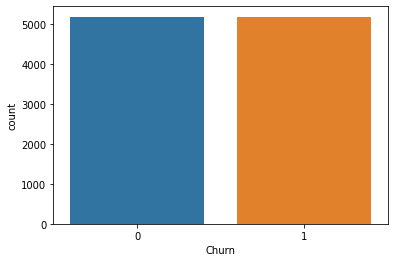

In [ ]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Aula 2 - Método baseado na proximidade

## 2.1 - Modelo K-nearest neighbors (KNN)

(Slides)

## 2.2 - KNN por trás dos panos

In [18]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [19]:
#ymaria = ?

In [20]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [21]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [22]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.03453023, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 , -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
        -0.54480692,  1.88720123]])

In [23]:
X_normalizado[0]

array([ 1.03453023, -0.65401193, -3.05401039,  0.8297975 , -0.43991649,
       -1.27744458, -1.16032292, -0.96332984,  3.05401039, -0.85417615,
        1.38171215, -0.88565976, -0.52592737,  1.00669571, -0.52592737,
       -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
       -0.52592737, -0.72396752,  1.0138687 , -0.52592737, -0.63943864,
        1.2273572 , -0.52592737, -0.79013171,  1.23648892, -0.52592737,
       -0.79607014, -0.56297505,  0.90418382, -0.51424938, -0.52504733,
        1.40641839, -0.54480692, -0.5298852 ])

In [24]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.96662231, -0.65401193,  0.32743831,  0.8297975 , -0.43991649,
        -1.31816495, -0.82630172,  1.03806605, -0.32743831, -0.85417615,
        -0.72373975,  1.12910177, -0.52592737,  1.00669571, -0.52592737,
        -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
         1.90140322, -0.72396752, -0.98632101,  1.90140322, -0.63943864,
         1.2273572 , -0.52592737, -0.79013171, -0.80874158, -0.52592737,
         1.25617071, -0.56297505, -1.1059698 ,  1.94458183, -0.52504733,
        -0.71102597, -0.54480692,  1.88720123]])

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [25]:
import numpy as np

In [26]:
a = Xmaria_normalizado

In [27]:
b = X_normalizado[0]

In [28]:
#1 - começamos subtraindo 
a - b

array([[-2.00115254,  0.        ,  3.3814487 ,  0.        ,  0.        ,
        -0.04072036,  0.3340212 ,  2.00139589, -3.3814487 ,  0.        ,
        -2.10545189,  2.01476153,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.42733059,  0.        , -2.00018971,  2.42733059,  0.        ,
         0.        ,  0.        ,  0.        , -2.0452305 ,  0.        ,
         2.05224086,  0.        , -2.01015362,  2.45883121,  0.        ,
        -2.11744436,  0.        ,  2.41708643]])

In [29]:
#2 - depois realizamos a exponenciação
np.square(a-b)

array([[4.00461149e+00, 0.00000000e+00, 1.14341953e+01, 0.00000000e+00,
        0.00000000e+00, 1.65814802e-03, 1.11570160e-01, 4.00558550e+00,
        1.14341953e+01, 0.00000000e+00, 4.43292768e+00, 4.05926401e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.89193381e+00, 0.00000000e+00, 4.00075888e+00, 5.89193381e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.18296779e+00, 0.00000000e+00, 4.21169253e+00, 0.00000000e+00,
        4.04071758e+00, 6.04585093e+00, 0.00000000e+00, 4.48357062e+00,
        0.00000000e+00, 5.84230682e+00]])

In [30]:
#3 - a soma 
np.sum(np.square(a-b))

84.07574038273466

In [31]:
#4 - então tiramos a raiz e temos nossa distância
np.sqrt(91.70603225977928)

9.576326657950807

## 2.3 - Implementando o modelo

In [32]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [33]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### Treino e teste 

In [34]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

In [36]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [37]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [38]:
predito_knn

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)